# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**: Jiaming Yuan (jy729), Ari Schor (aes392), Grace Raab (gar238)

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Documents/Programming/Julia/BEE4750/hw/hw2-jiaming-s-group`


In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

![river diagram](<attachment:Screenshot 2024-09-17 014209.png>)
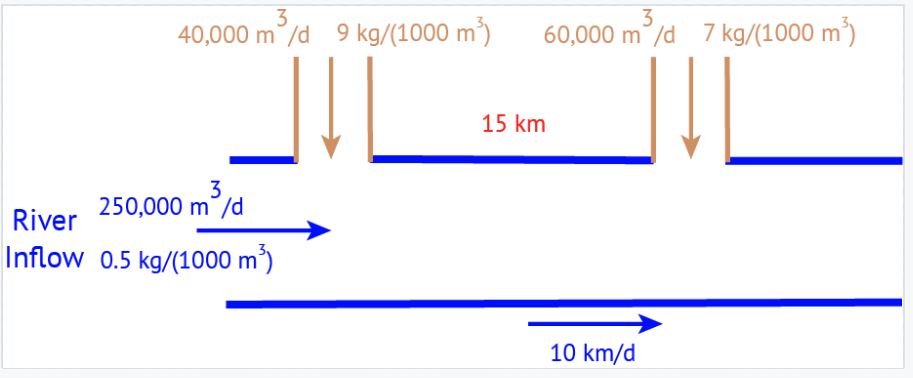

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.


### Written Response for Problem 1

NEED TO FILL

![written work](<attachment:Screenshot 2024-09-17 221031.png>)
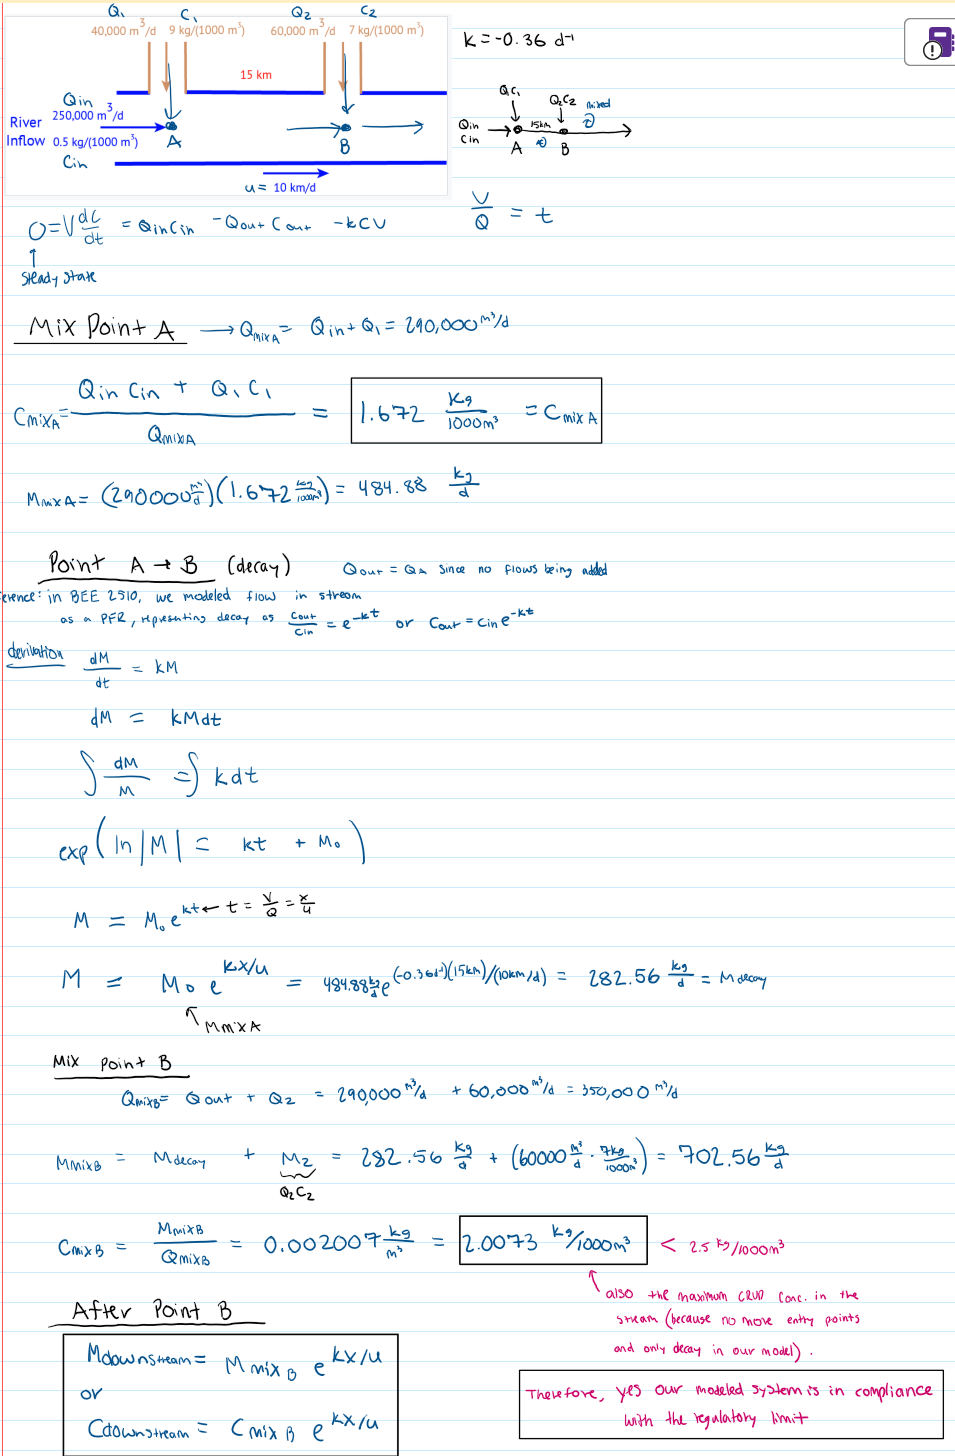


### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

#### Write Up for Problem 2

When $a = 0$, the equilibria are at $0.0, 0.3819660112501051, and 1.0$ . $0$ and $1$ are stable equilibria, while 0.3819660112501051 is an unstable equilibrium. When the analysis is repeated for $a = 0.02$, the new equilibria are $0.1162444196607475, 0.15442860418310408, and 1.1341008852434813$ . The first and last equilibria are stable while the middle equilibrium is unstable, which is a similar pattern as the first simulation where $a = 0$. The new lower equilibrium shows that having even a very small constant point source discharge will cause the lake phosphorus concentration to converge to a nonzero value. Additionally, it is much easier for the lake to eutrophy now because the unstable equilibrium is considerably lower (before, any initial value lower than $0.38$ will result in a phosphorus concentration of zero because the lake can flush it out, but with a point source, any initial value higher than $0.15$ will cause the lake to eutrophy).

Any[0.1162444196607475, 0.15442860418310408, 1.1341008852434813]

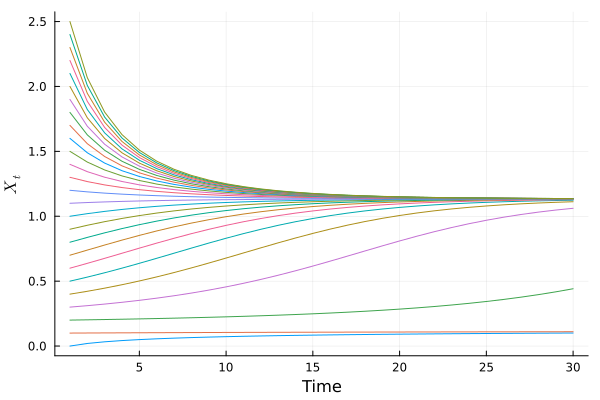

In [33]:
#define variables
T = 30
a = 0.02
at = zeros(T);
for i in 1:T
    at[i] = a
end
q = 1.5;
b = 0.5;
yt = zeros(T);

# define functions for lake recycling and outflows
X_recycling(x, q) = x.^q ./ (1 .+ x.^q);
X_outflow(x, b) = b .* x;

#simulation
X_vals = collect(0.0:0.1:2.5)
function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t] .+ X_recycling(X[t-1], q) .- X_outflow(X[t-1], b)
    end
    return X
end
X = map(x -> simulate_lake_P(x, T, b, q, at, yt), X_vals)

#find the equilibria (this is also just the code he gave in the instructions above)
X_delta(x, a) = a + X_recycling(x,q) - X_outflow(x,b)
x0 = [0.0, 0.3, 1]
equilibria = []
for i in 1:length(x0)
    equilibrium = Roots.find_zero(x -> X_delta(x, a), x0[i])
    equilibria = append!(equilibria, equilibrium)
end
print(equilibria)
p_noinflow = plot(X, label=false, ylabel=L"X_t", xlabel="Time")

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.